In [33]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv(r"C:\Users\moham\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [44]:
df.shape

(101766, 50)

In [45]:
df=df.replace('?',np.nan)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [46]:
df=df.dropna(subset=['diag_1','diag_2','diag_3'])

In [48]:
df['gender']=df['gender'].replace('Unknown/Invalid',np.nan)
df['gender'].dropna(inplace=True)

In [51]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

<Axes: xlabel='gender', ylabel='count'>

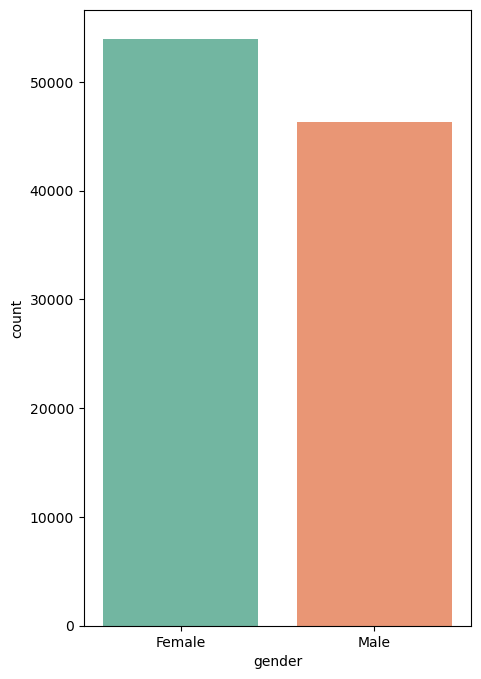

In [52]:
plt.figure(figsize=(5,8))
sns.countplot(x='gender', data=df,palette='Set2')

In [54]:
df['race']=df['race'].fillna(df['race'].mode()[0])

In [55]:
df['race'].value_counts()

race
Caucasian          77270
AfricanAmerican    18881
Hispanic            1984
Other               1484
Asian                625
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

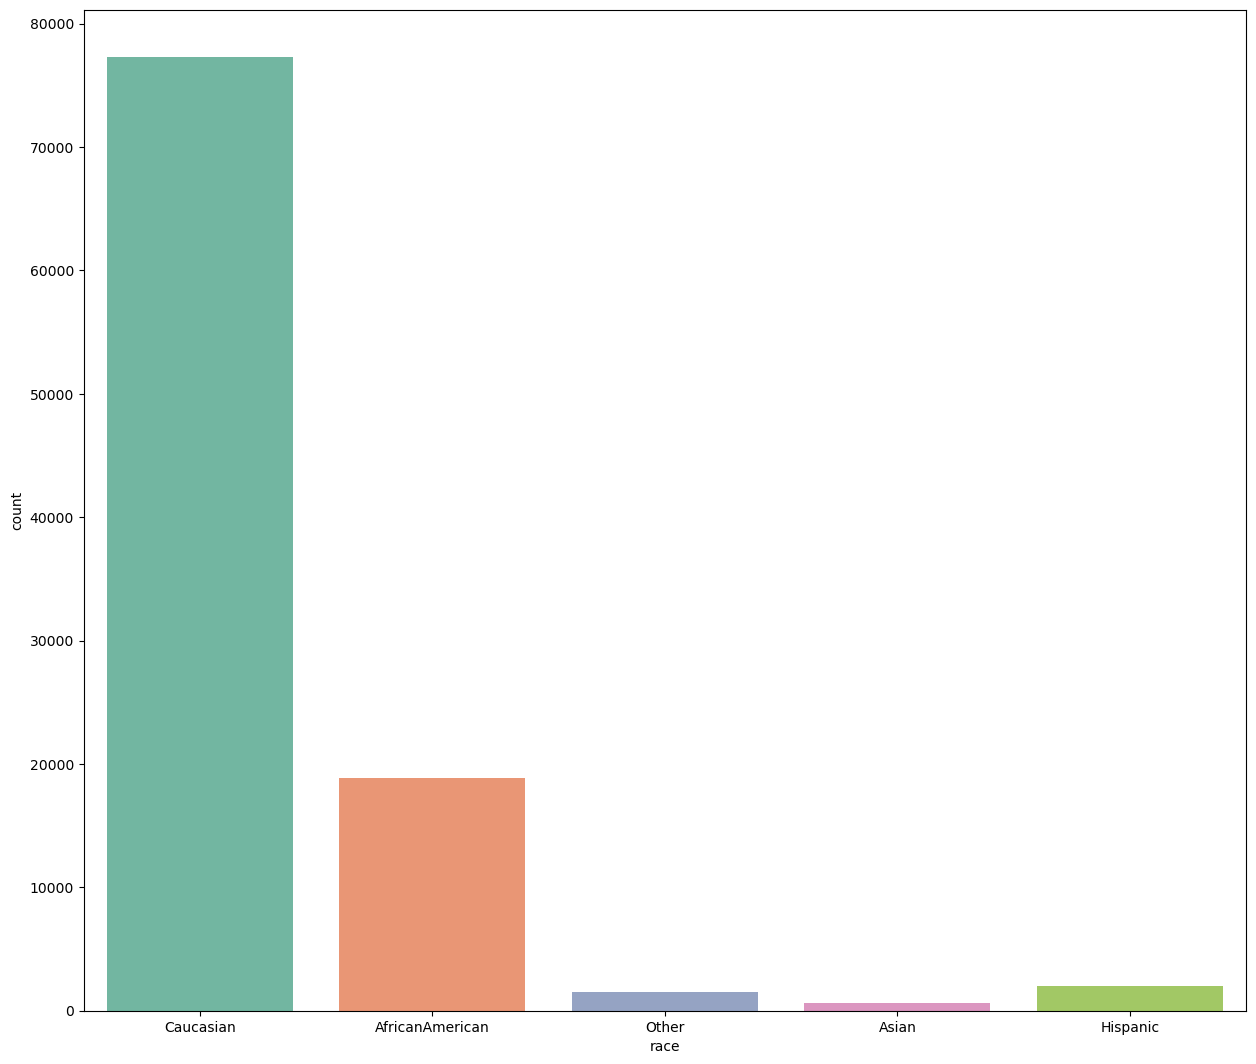

In [56]:
plt.figure(figsize=(15,13))
sns.countplot(x='race', data=df,palette='Set2')

In [59]:
 df['readmitted'] = df['readmitted'].replace({'>30' :0,'NO' :0, '<30' :1})

In [60]:
df['readmitted'].value_counts()

readmitted
0    88994
1    11250
Name: count, dtype: int64

<Axes: xlabel='readmitted', ylabel='count'>

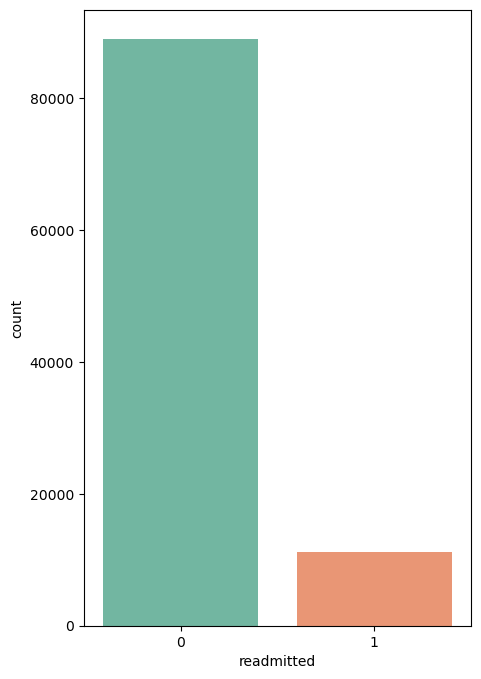

In [61]:
plt.figure(figsize=(5,8))
sns.countplot(x='readmitted', data=df,palette='Set2')

In [1]:
plt.savefig("filename.png", dpi=300)

NameError: name 'plt' is not defined

<Axes: xlabel='age', ylabel='count'>

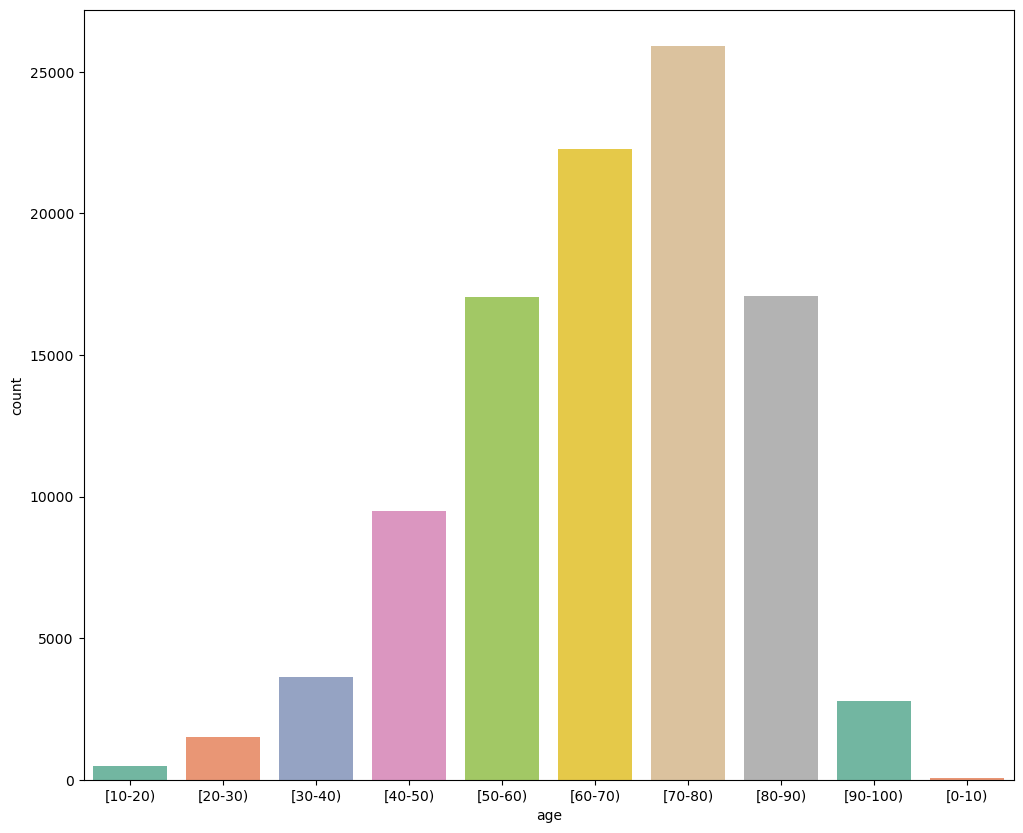

In [62]:
plt.figure(figsize=(12,10))
sns.countplot(x='age', data=df,palette='Set2')

In [63]:
df.num_lab_procedures.value_counts()

num_lab_procedures
1      3154
43     2777
44     2462
45     2353
38     2178
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

<Axes: xlabel='num_lab_procedures', ylabel='Density'>

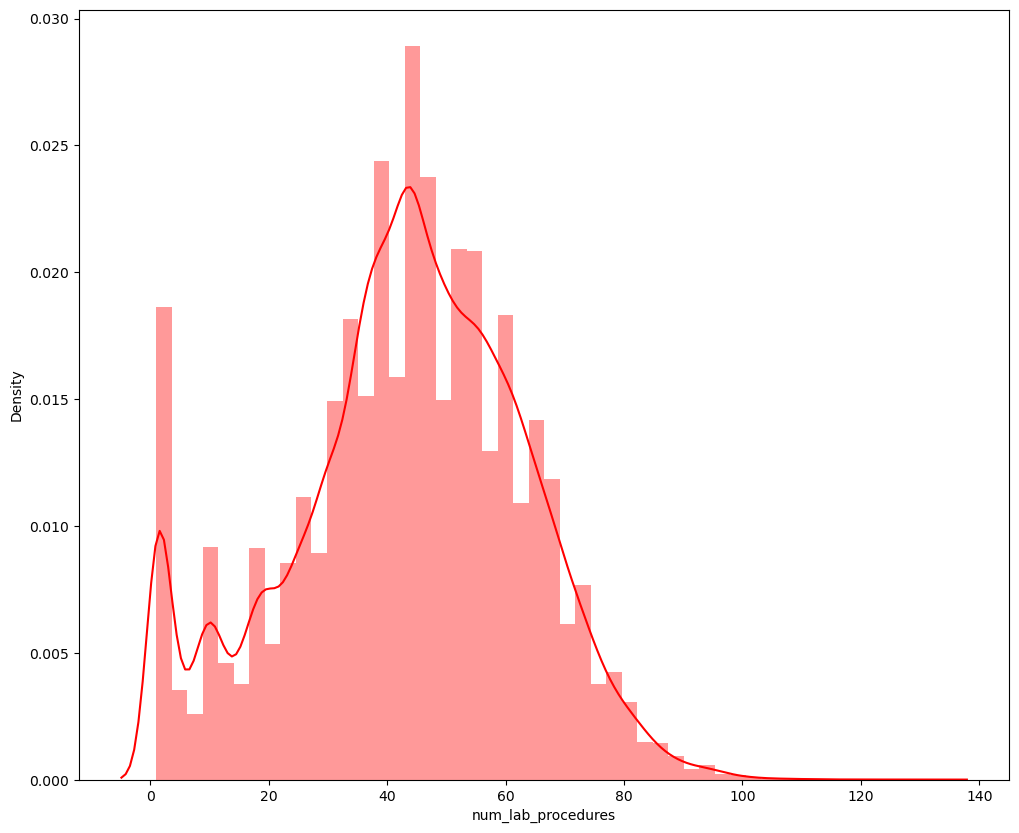

In [66]:
plt.figure(figsize=(12,10))
sns.distplot(df['num_lab_procedures'],color='red')

In [67]:
df.num_procedures.value_counts()

num_procedures
0    45680
1    20415
2    12608
3     9381
6     4940
4     4157
5     3063
Name: count, dtype: int64

<Axes: xlabel='num_procedures', ylabel='Density'>

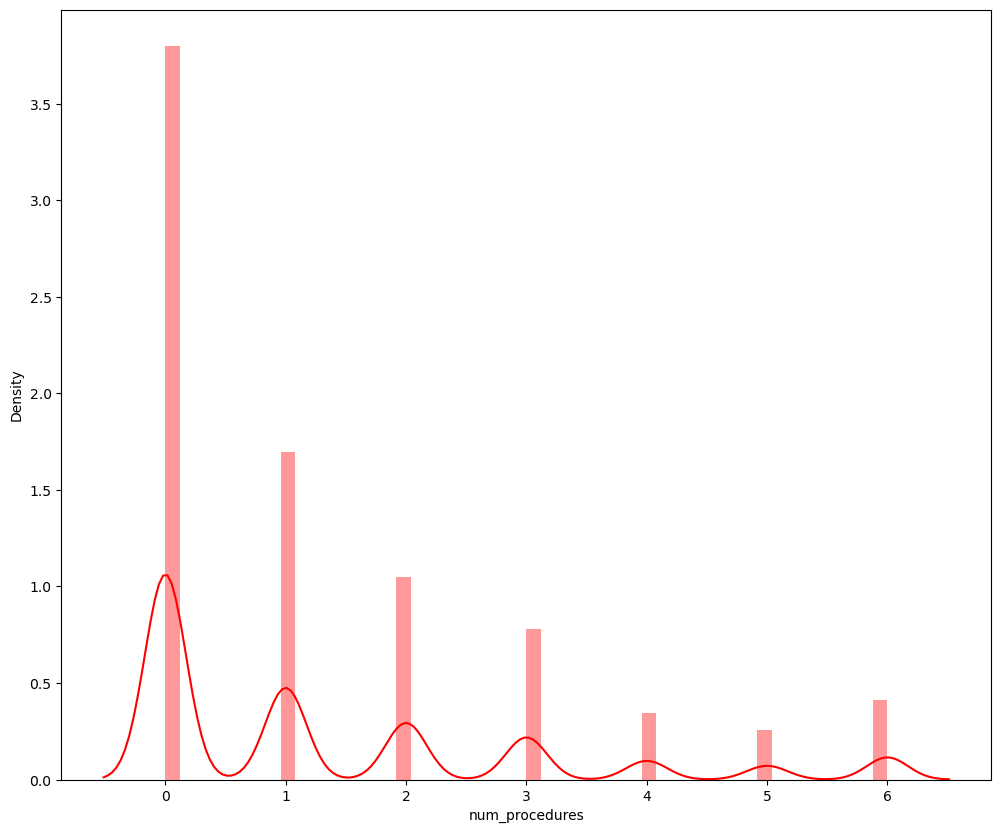

In [68]:
plt.figure(figsize=(12,10))
sns.distplot(df['num_procedures'],color='red')

In [69]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     59005
3     13897
6     12830
18     3642
2      2115
22     1982
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [74]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged to home',
                                                 6:'Discharged to home',
                                                 8:'Discharged to home',
                                                 2:'Transferred to another facility',  
                                                 3:'Transferred to another facility',
                                                 4:'Transferred to another facility',
                                                 5:'Transferred to another facility',
                                                16:'Transferred to another facility',
                                                22:'Transferred to another facility',
                                                23:'Transferred to another facility',
                                                24:'Transferred to another facility',
                                                27:'Transferred to another facility',
                                                28:'Transferred to another facility', 
                                                29:'Transferred to another facility',  
                                                30:'Transferred to another facility',
                                                 7:'Left AMA',
                                                 9:'Still patient/referred to this institution',        
                                                12:'Still patient/referred to this institution',
                                                15:'Still patient/referred to this institution',
                                                17:'Still patient/referred to this institution',
                                                10:'Neonate discharged',
                                                11:'Expired',
                                                19:'Expired',
                                                20:'Expired',  
                                                21:'Expired', 
                                                13:'Hospice',    
                                                14:'Hospice', 
                                                18:'Not Available',     
                                                25:'Not Available',  
                                                26:'Not Available'}) 

In [79]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                            71942
Transferred to another facility               20574
Not Available                                  4598
Expired                                        1650
Hospice                                         769
Left AMA                                        604
Still patient/referred to this institution      101
Neonate discharged                                6
Name: count, dtype: int64

<Axes: xlabel='discharge_disposition_id', ylabel='count'>

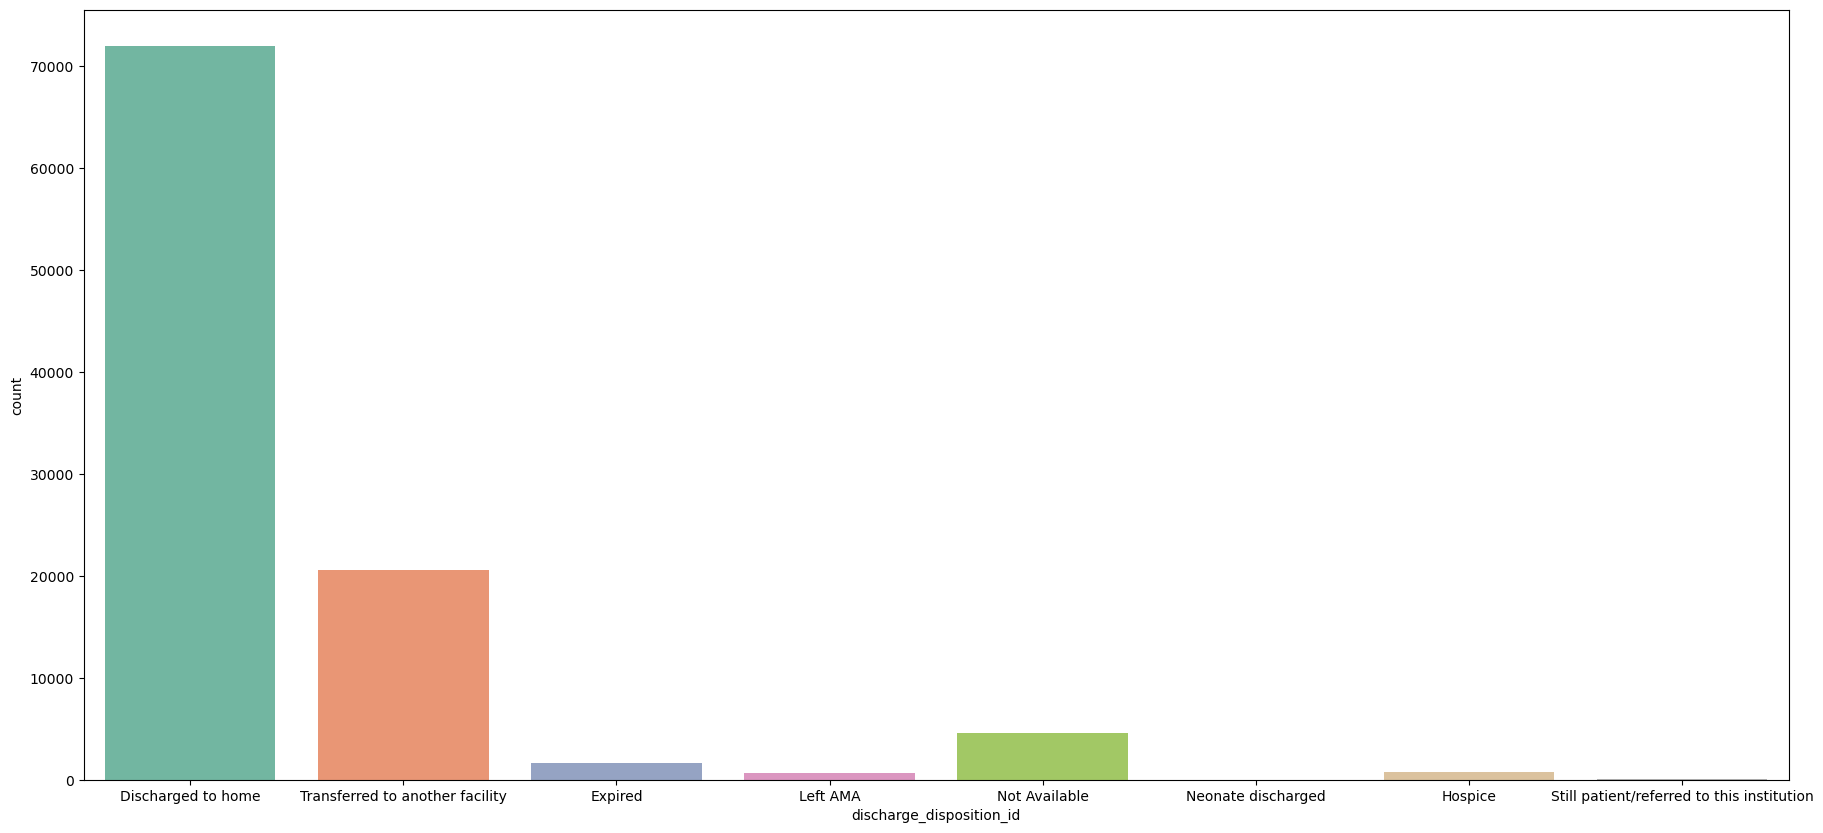

In [80]:
plt.figure(figsize=(22,10))
sns.countplot(x='discharge_disposition_id', data=df,palette='Set2')

In [85]:
df['change'].value_counts()

change
No    53892
Ch    46352
Name: count, dtype: int64

<Axes: xlabel='change', ylabel='count'>

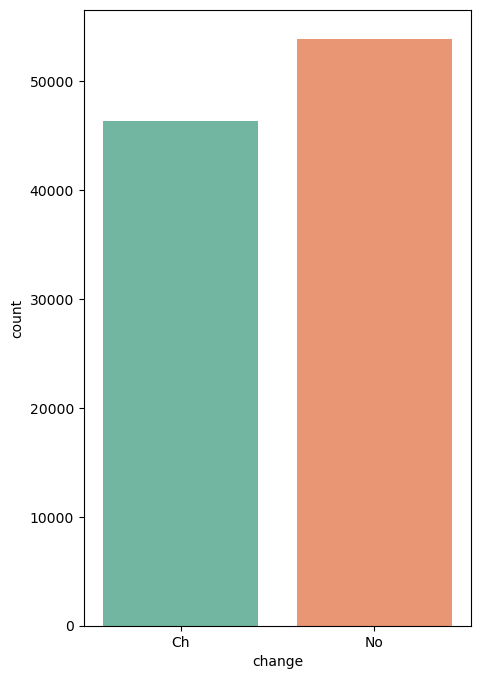

In [86]:
plt.figure(figsize=(5,8))
sns.countplot(x='change', data=df,palette='Set2')

In [87]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      97073
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  39455
medical_specialty           49482
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               94981
A1Cresult                   83645
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [90]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes',1)
df['diabetesMed'] = df['diabetesMed'].replace('No',0)

In [91]:
df['diabetesMed'].value_counts()

diabetesMed
1    77155
0    23089
Name: count, dtype: int64

<Axes: xlabel='change', ylabel='diabetesMed'>

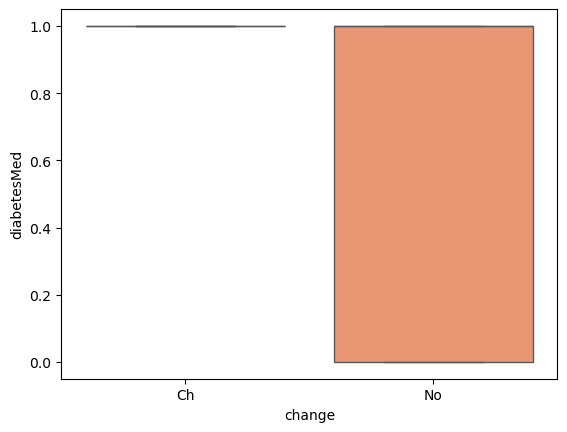

In [93]:
sns.boxplot(x='change', y='diabetesMed', data=df,palette='Set2')


In [139]:
# Step 1: Reload or undo changes to restore original 'readmitted'
df = pd.read_csv(r"C:\Users\moham\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")  # Or undo edits

# Step 2: Create a new column for encoded values
df['readmitted_encoded'] = df['readmitted'].replace({
    '>30': 0,
    'NO': 0,
    '<30': 1
})

# Step 3: Generate crosstabs
original_crosstab = pd.crosstab(df['age'], df['readmitted'])  # Shows >30, NO, <30
encoded_crosstab = pd.crosstab(df['age'], df['readmitted_encoded'])  # Shows 0, 1

In [141]:
pd.crosstab(df['age'],df['readmitted'])

readmitted,<30,>30,NO
age,,,
[0-10),3,26,132
[10-20),40,224,427
[20-30),236,510,911
[30-40),424,1187,2164
[40-50),1027,3278,5380
[50-60),1668,5917,9671
[60-70),2502,7897,12084
[70-80),3069,9475,13524
[80-90),2078,6223,8896


In [100]:

df['A1Cresult'].value_counts()

A1Cresult
>8      7877
Norm    4935
>7      3787
Name: count, dtype: int64

In [151]:
# For A1Cresult (from your screenshot 60)
df['A1Cresult'] = df['A1Cresult'].replace(['No', 'NONE', 'none'], 'None')
df['A1Cresult'] = df['A1Cresult'].fillna('None')

In [153]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [155]:
df['A1Cresult'].value_counts()

A1Cresult
None    84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [129]:
df['insulin']

1             Up
2             No
3             Up
4         Steady
5         Steady
           ...  
101761      Down
101762    Steady
101763      Down
101764        Up
101765        No
Name: insulin, Length: 100244, dtype: object

In [143]:
pd.crosstab(df['insulin'],df['readmitted'])

readmitted,<30,>30,NO
insulin,,,
Down,1698,4752,5768
No,4756,15949,26678
Steady,3433,10482,16934
Up,1470,4362,5484


In [145]:
pd.crosstab(df['diabetesMed'],df['readmitted'])

readmitted,<30,>30,NO
diabetesMed,,,
No,2246,7227,13930
Yes,9111,28318,40934


In [157]:
pd.crosstab(df['A1Cresult'],df['readmitted'])

readmitted,<30,>30,NO
A1Cresult,,,
>7,383,1300,2129
>8,811,2901,4504
None,9681,29745,45322
Norm,482,1599,2909


In [159]:
pd.crosstab(df['A1Cresult'],df['change'])

change,Ch,No
A1Cresult,,
>7,1935,1877
>8,5349,2867
None,37521,47227
Norm,2206,2784


In [161]:
df['max_glu_serum'].value_counts()

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [163]:
# For max_glu_serum
df['max_glu_serum'] = df['max_glu_serum'].fillna('None')

In [165]:
df['max_glu_serum'].value_counts()

max_glu_serum
None    96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [167]:
pd.crosstab(df['max_glu_serum'],df['readmitted'])

readmitted,<30,>30,NO
max_glu_serum,,,
>200,185,530,770
>300,181,521,562
None,10696,33609,52115
Norm,295,885,1417


In [169]:
pd.crosstab(df['max_glu_serum'],df['A1Cresult'])

A1Cresult,>7,>8,None,Norm
max_glu_serum,,,,
>200,18,36,1414,17
>300,15,112,1135,2
None,3749,8039,79700,4932
Norm,30,29,2499,39


In [171]:
sns.boxplot(df['readmitted'],df['num_procedures'])

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='readmitted', ylabel='num_procedures'>

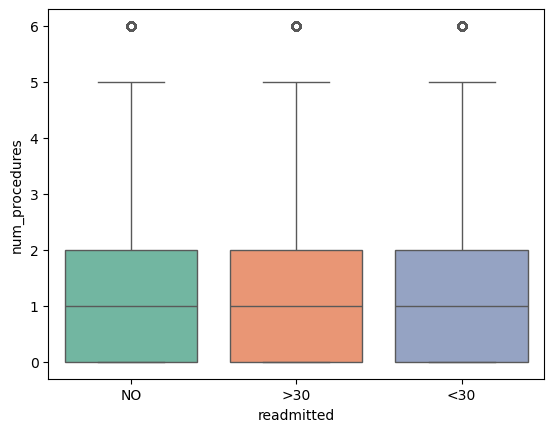

In [173]:
sns.boxplot(x='readmitted', y='num_procedures', data=df,palette='Set2')

In [175]:
df['num_procedures'].value_counts()

num_procedures
0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: count, dtype: int64

<Axes: xlabel='readmitted', ylabel='num_lab_procedures'>

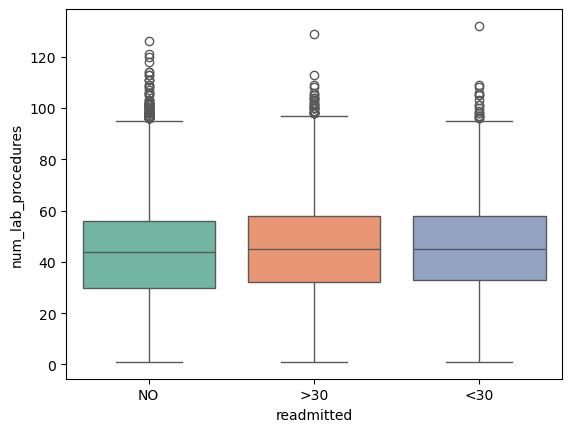

In [177]:
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df,palette='Set2')

In [187]:
 df['readmitted'] = df['readmitted'].replace({'>30' :0,'NO' :0, '<30' :1})

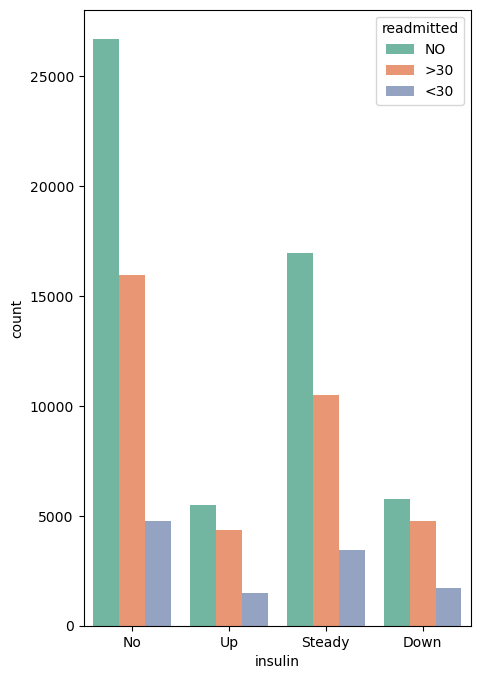

In [185]:
plt.figure(figsize=(5,8))
sns.countplot(x='insulin', hue='readmitted', data=df, palette='Set2')
plt.show()

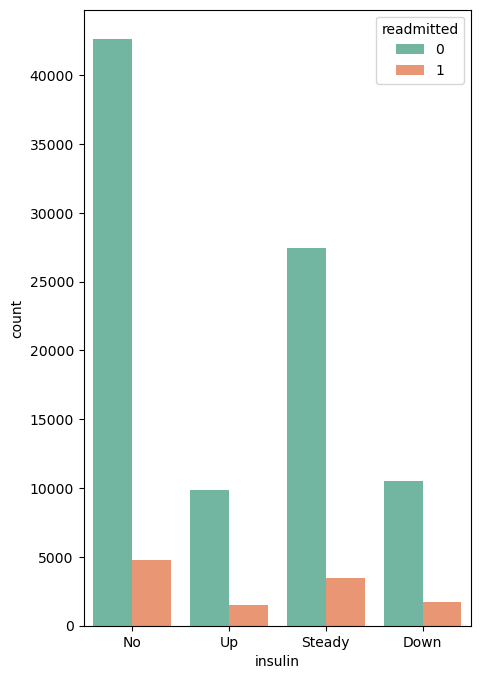

In [189]:
plt.figure(figsize=(5,8))
sns.countplot(x='insulin', hue='readmitted', data=df, palette='Set2')
plt.show()

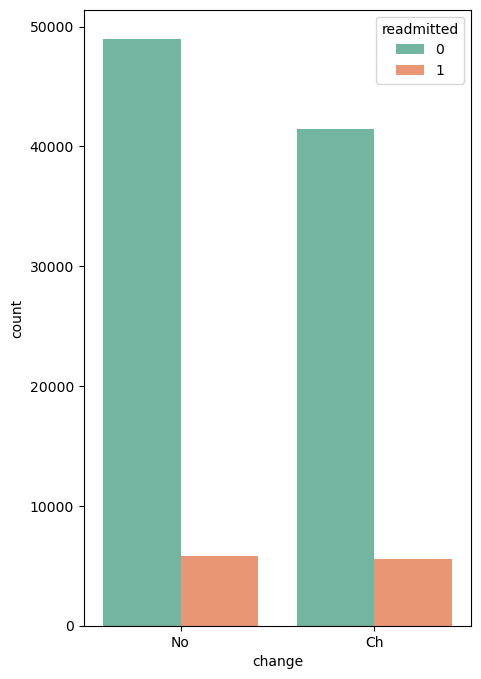

In [191]:
plt.figure(figsize=(5,8))
sns.countplot(x='change', hue='readmitted', data=df, palette='Set2')
plt.show()

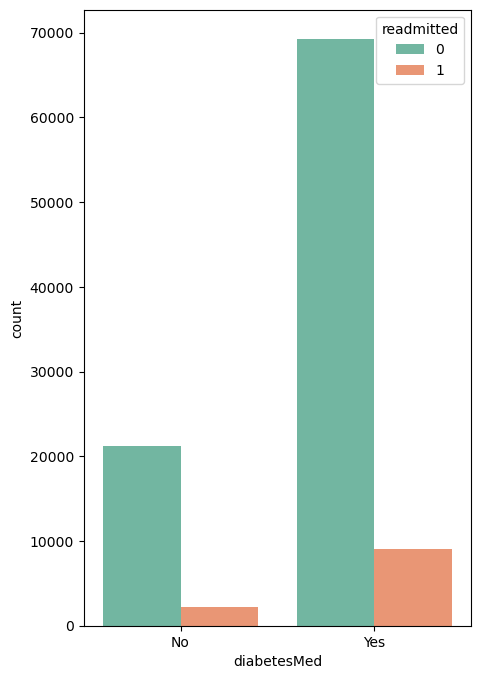

In [193]:
plt.figure(figsize=(5,8))
sns.countplot(x='diabetesMed', hue='readmitted', data=df, palette='Set2')
plt.show()

In [195]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

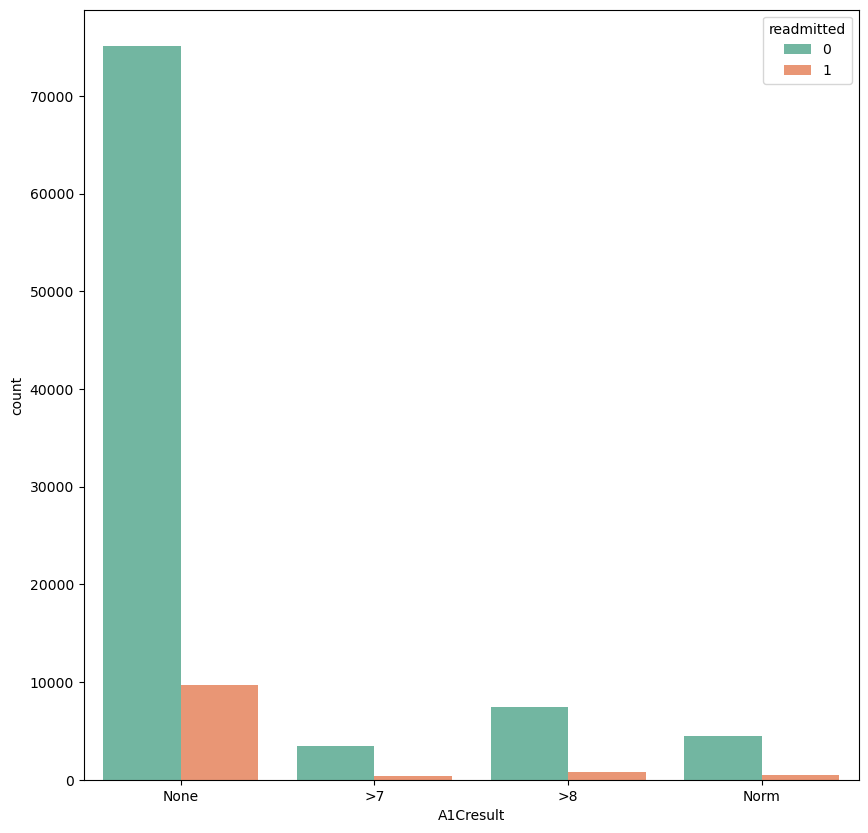

In [197]:
plt.figure(figsize=(10,10))
sns.countplot(x='A1Cresult', hue='readmitted', data=df, palette='Set2')
plt.show()

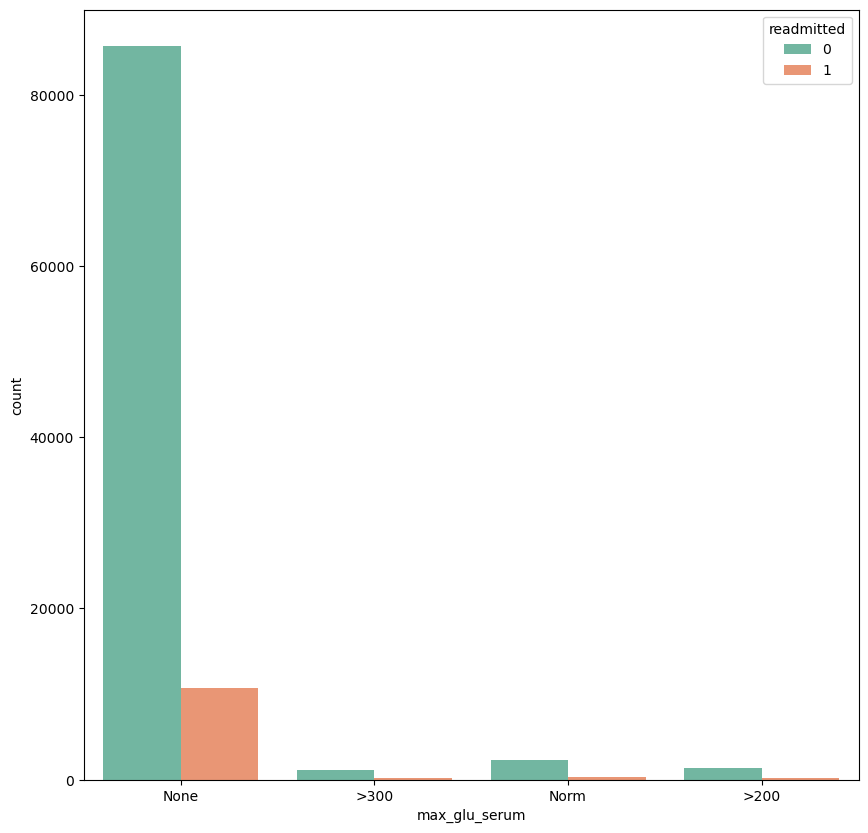

In [199]:
plt.figure(figsize=(10,10))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df, palette='Set2')
plt.show()

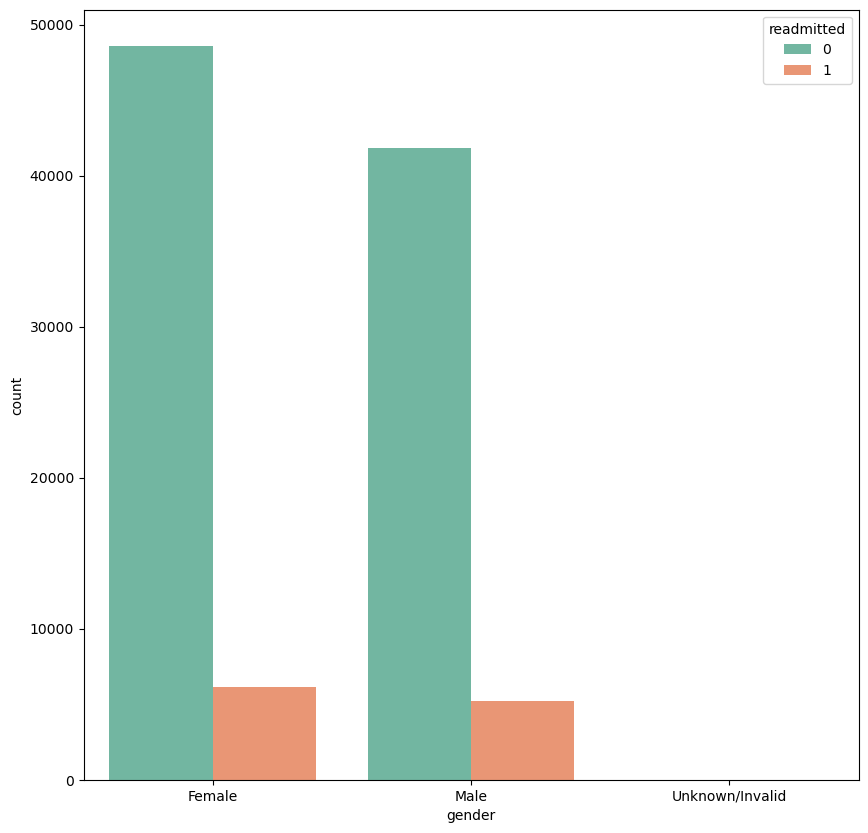

In [201]:
plt.figure(figsize=(10,10))
sns.countplot(x='gender', hue='readmitted', data=df, palette='Set2')
plt.show()

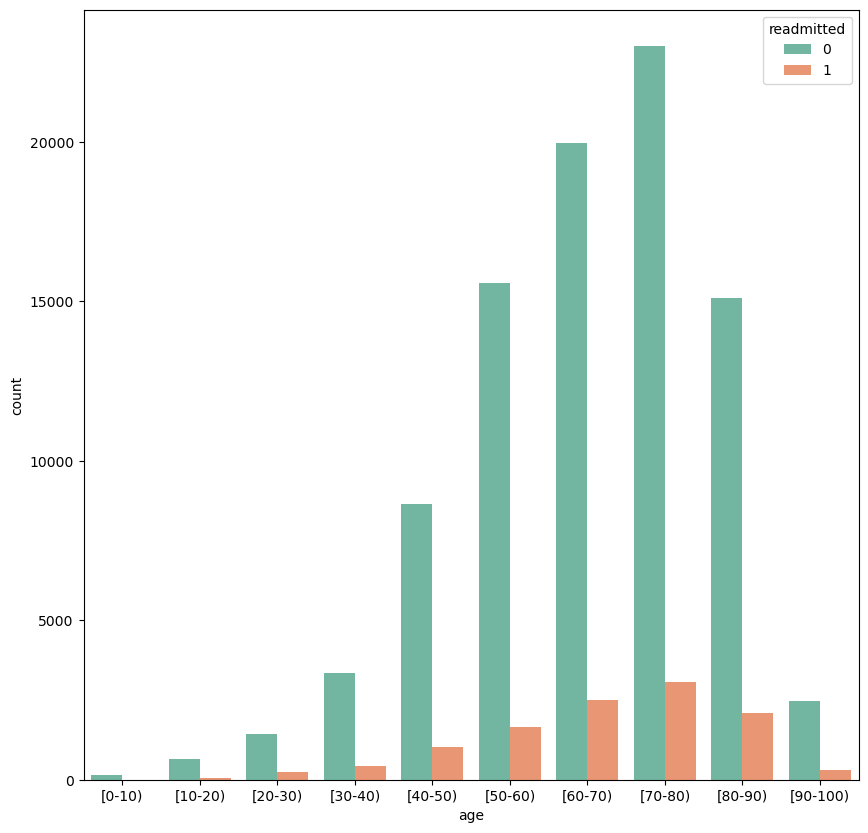

In [203]:
plt.figure(figsize=(10,10))
sns.countplot(x='age', hue='readmitted', data=df, palette='Set2')
plt.show()

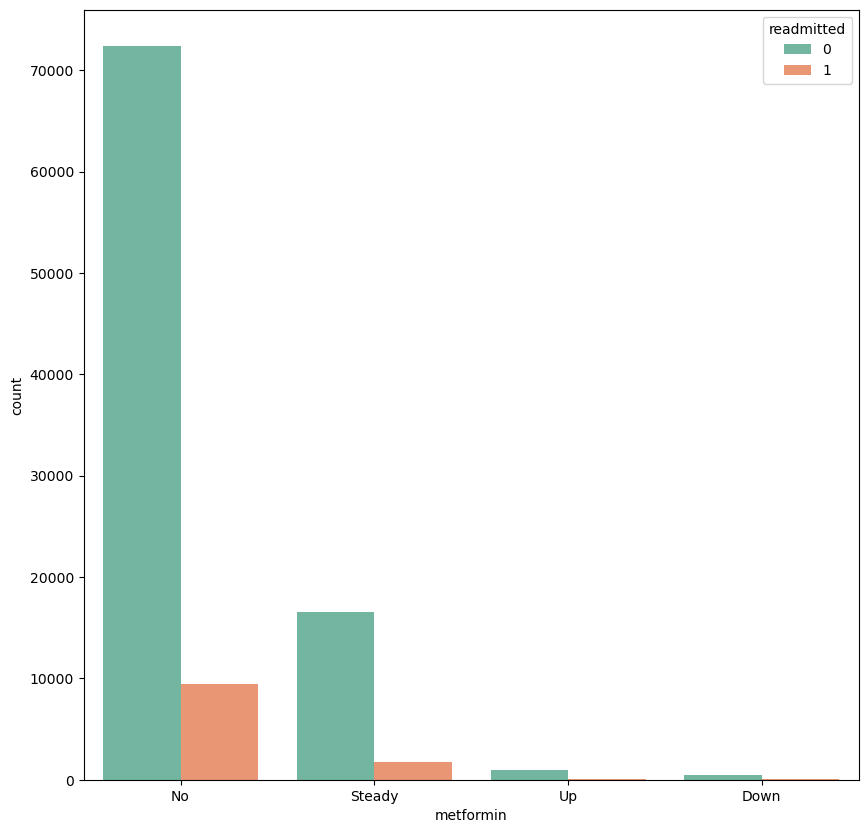

In [205]:
plt.figure(figsize=(10,10))
sns.countplot(x='metformin', hue='readmitted', data=df, palette='Set2')
plt.show()

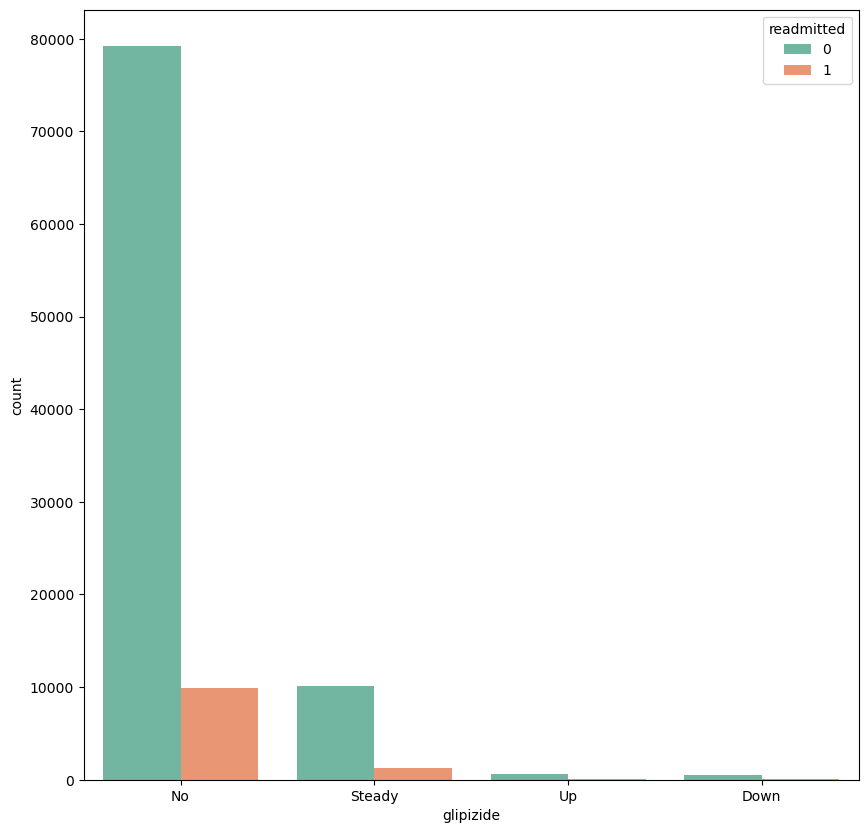

In [207]:
plt.figure(figsize=(10,10))
sns.countplot(x='glipizide', hue='readmitted', data=df, palette='Set2')
plt.show()

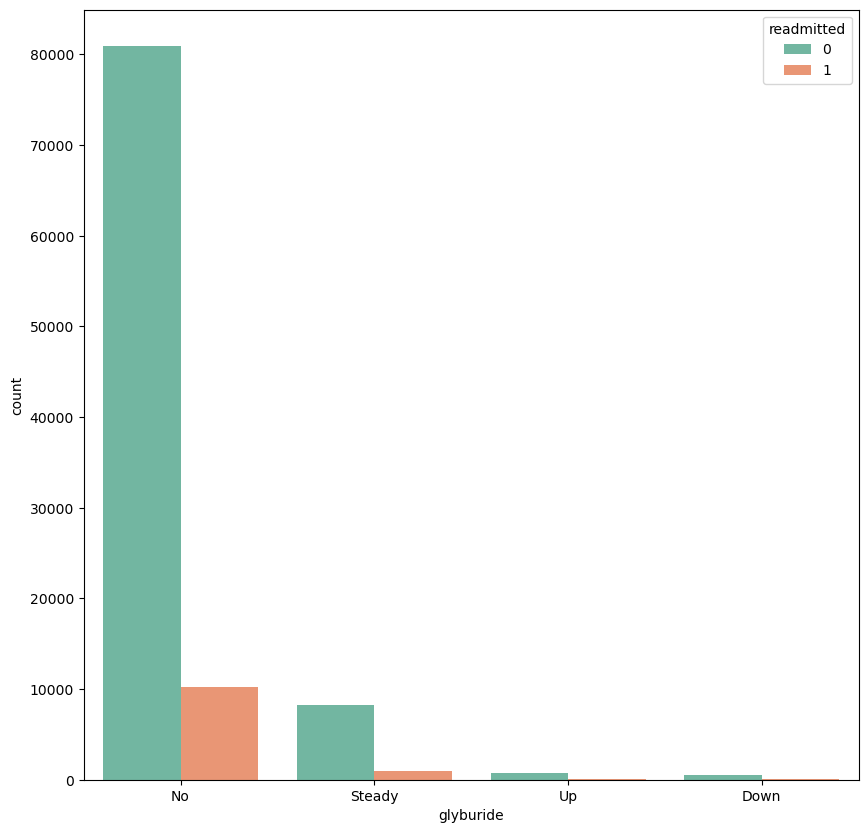

In [209]:
plt.figure(figsize=(10,10))
sns.countplot(x='glyburide', hue='readmitted', data=df, palette='Set2')
plt.show()

In [213]:
df['num_medications'].value_counts()

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

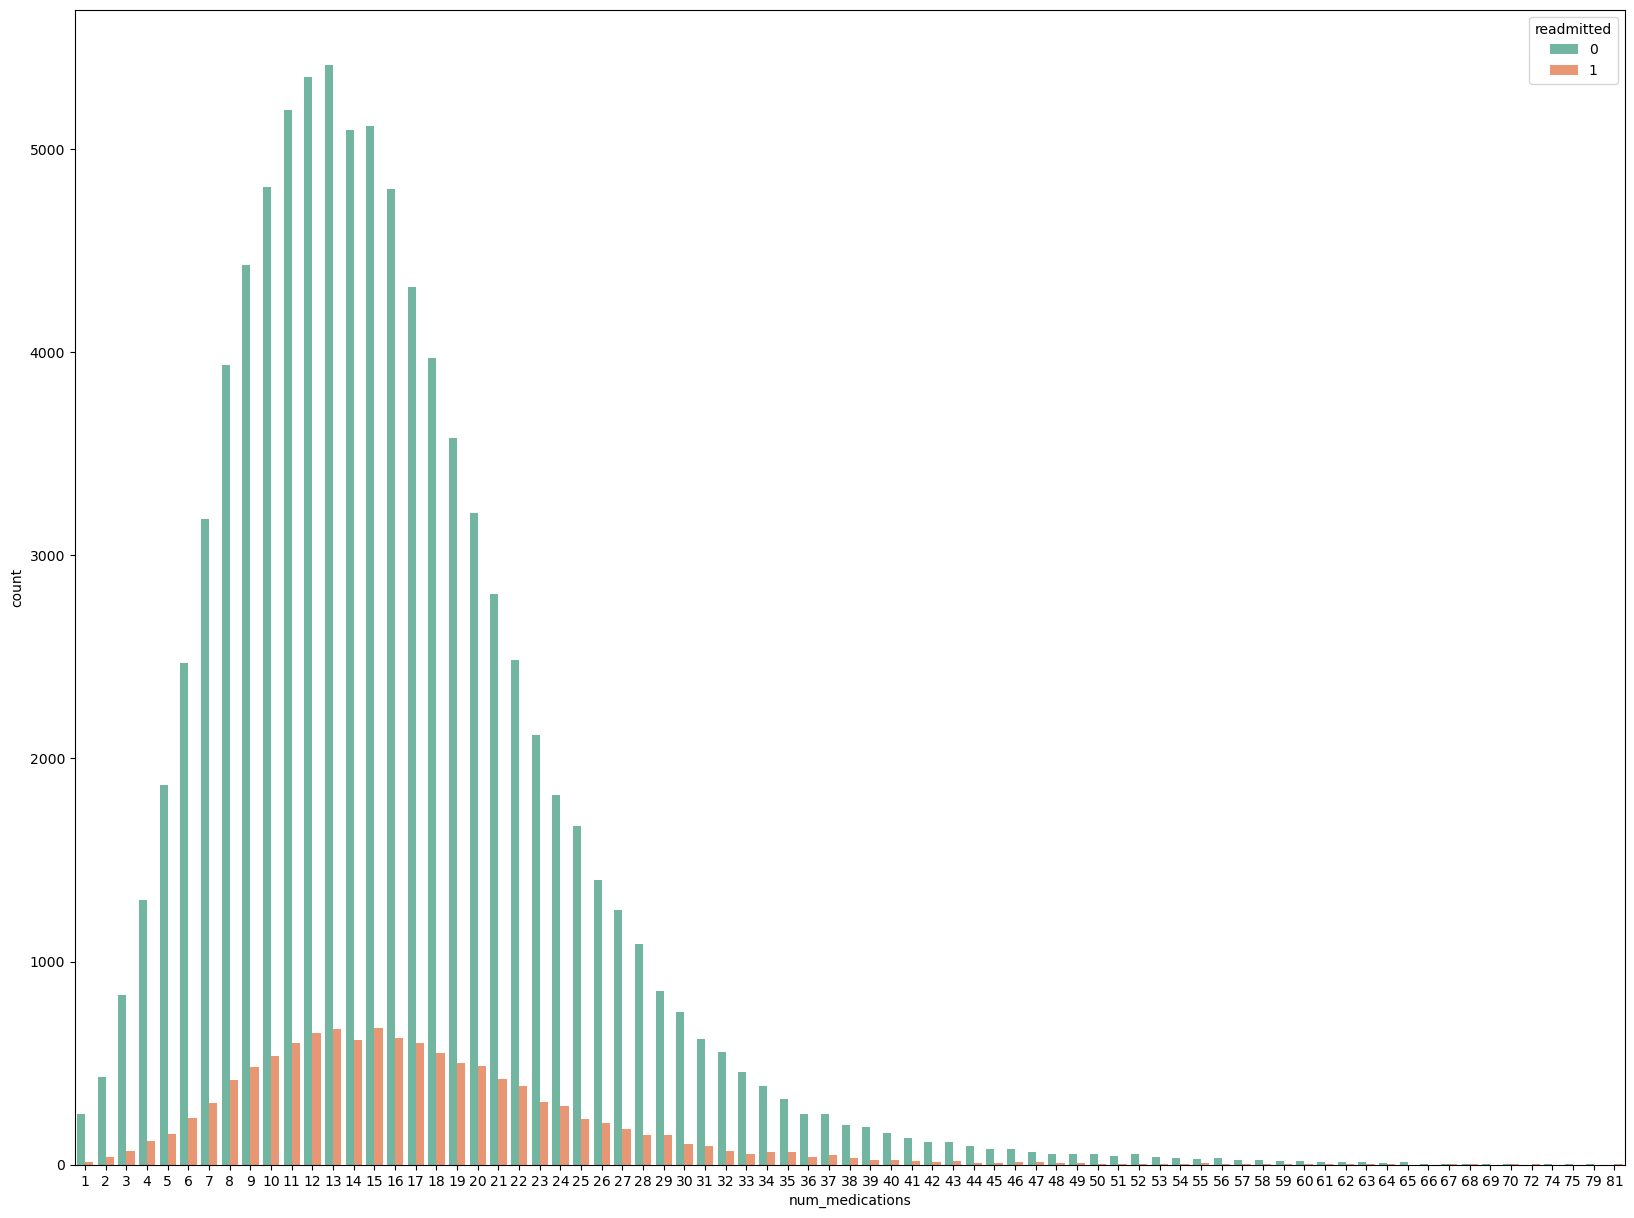

In [215]:
plt.figure(figsize=(20,15))
sns.countplot(x='num_medications', hue='readmitted', data=df, palette='Set2')
plt.show()

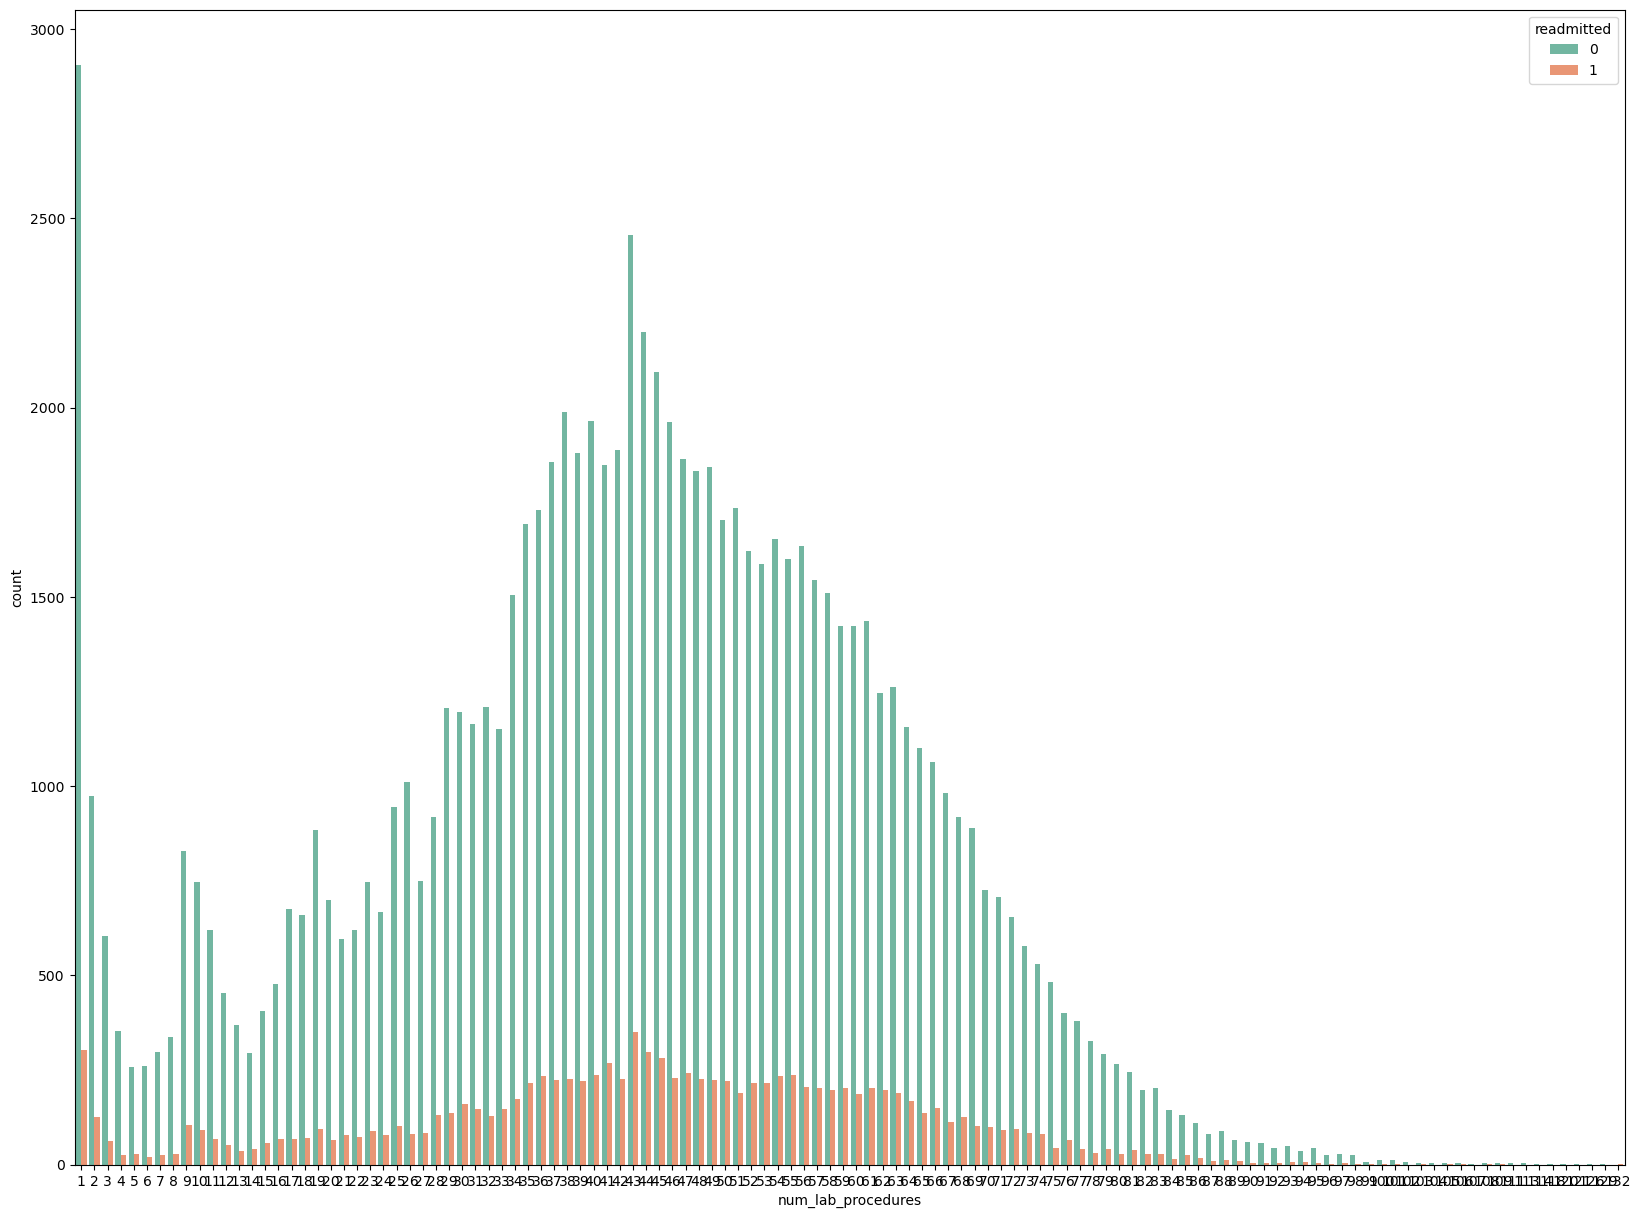

In [219]:
plt.figure(figsize=(20,15))
sns.countplot(x='num_lab_procedures', hue='readmitted', data=df, palette='Set2')
plt.show()

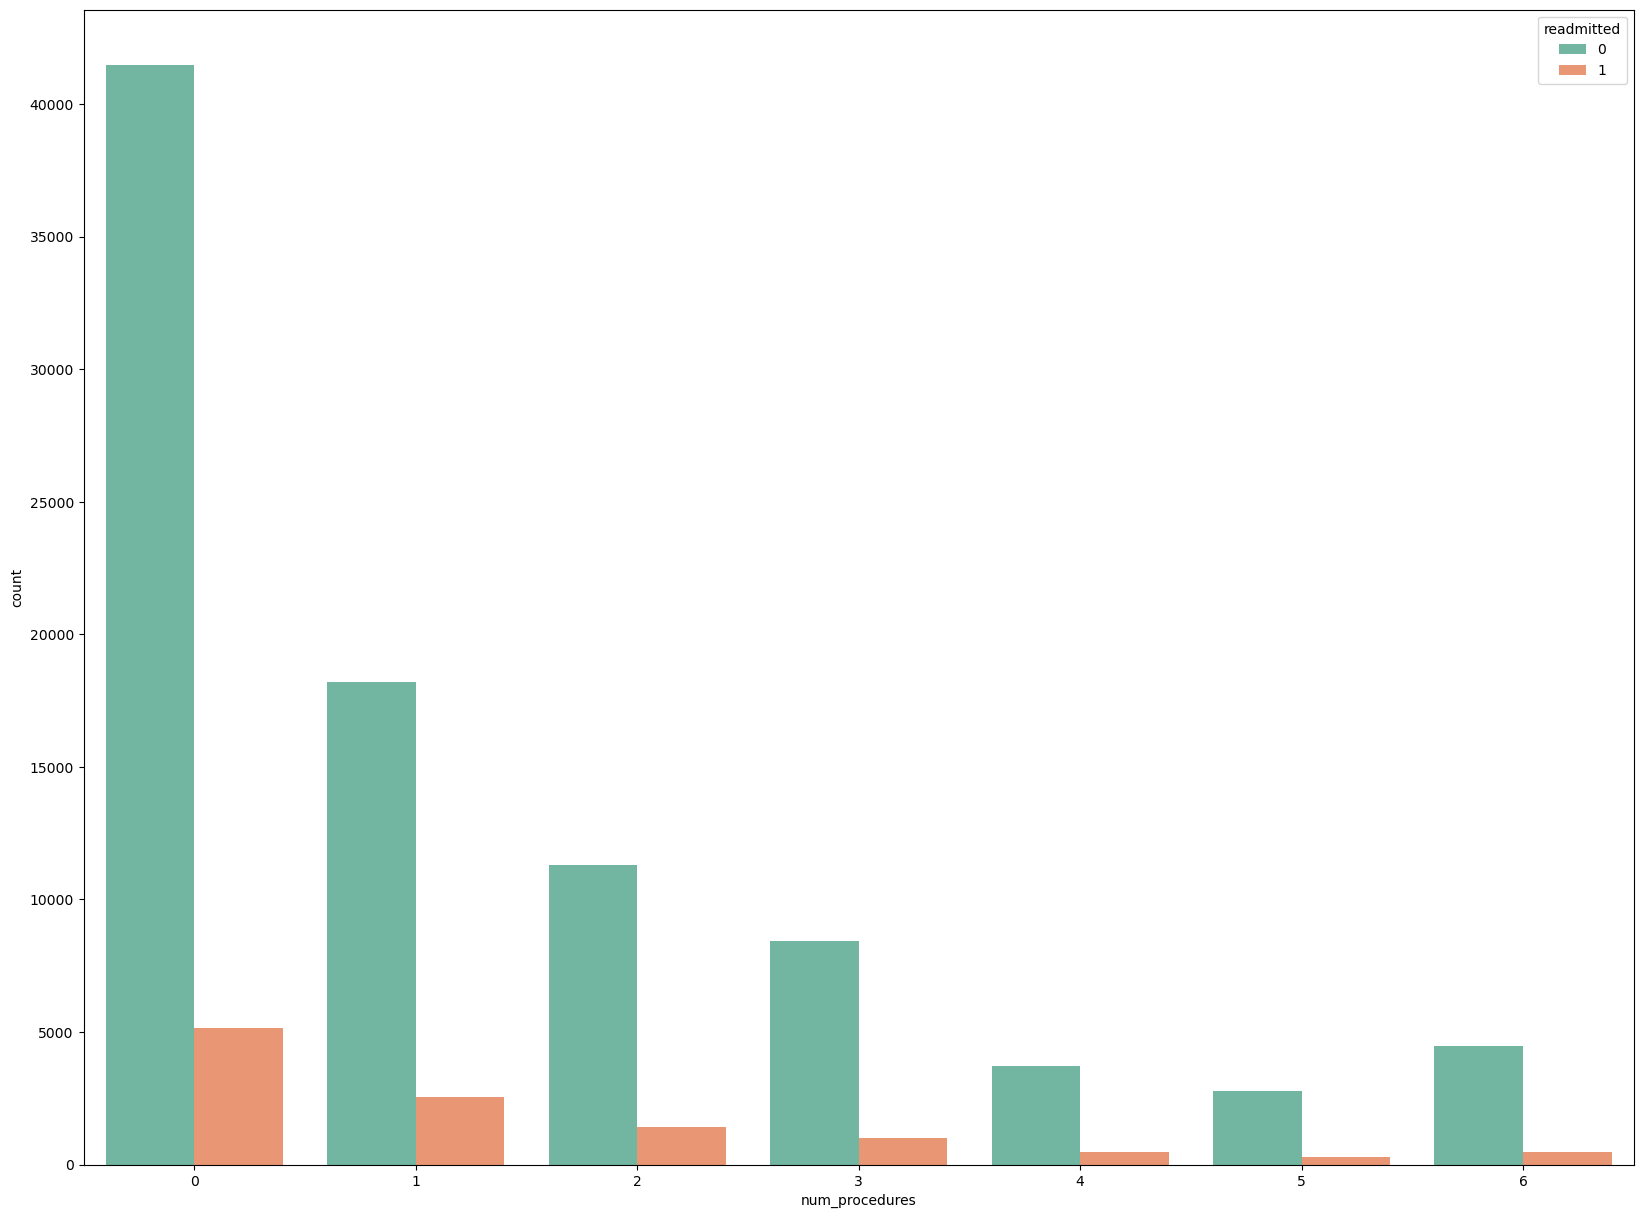

In [221]:
plt.figure(figsize=(20,15))
sns.countplot(x='num_procedures', hue='readmitted', data=df, palette='Set2')
plt.show()

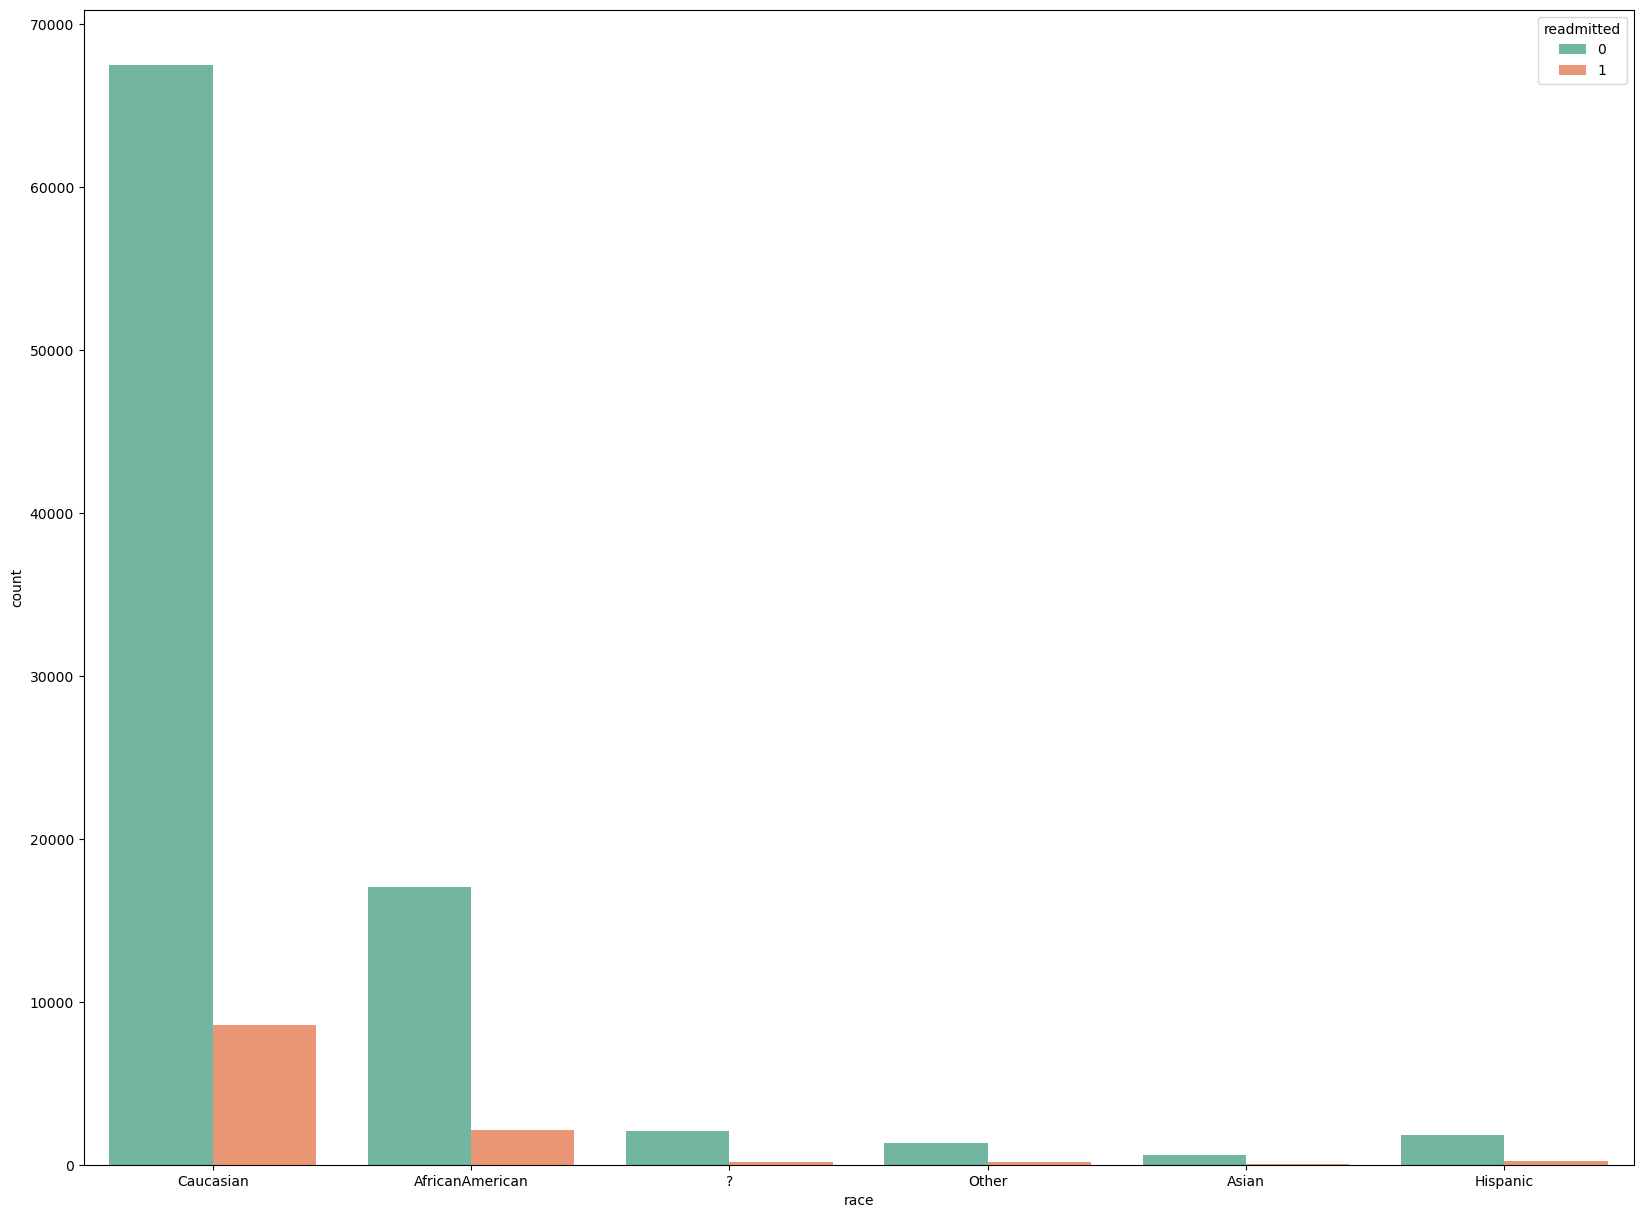

In [223]:
plt.figure(figsize=(20,15))
sns.countplot(x='race', hue='readmitted', data=df, palette='Set2')
plt.show()

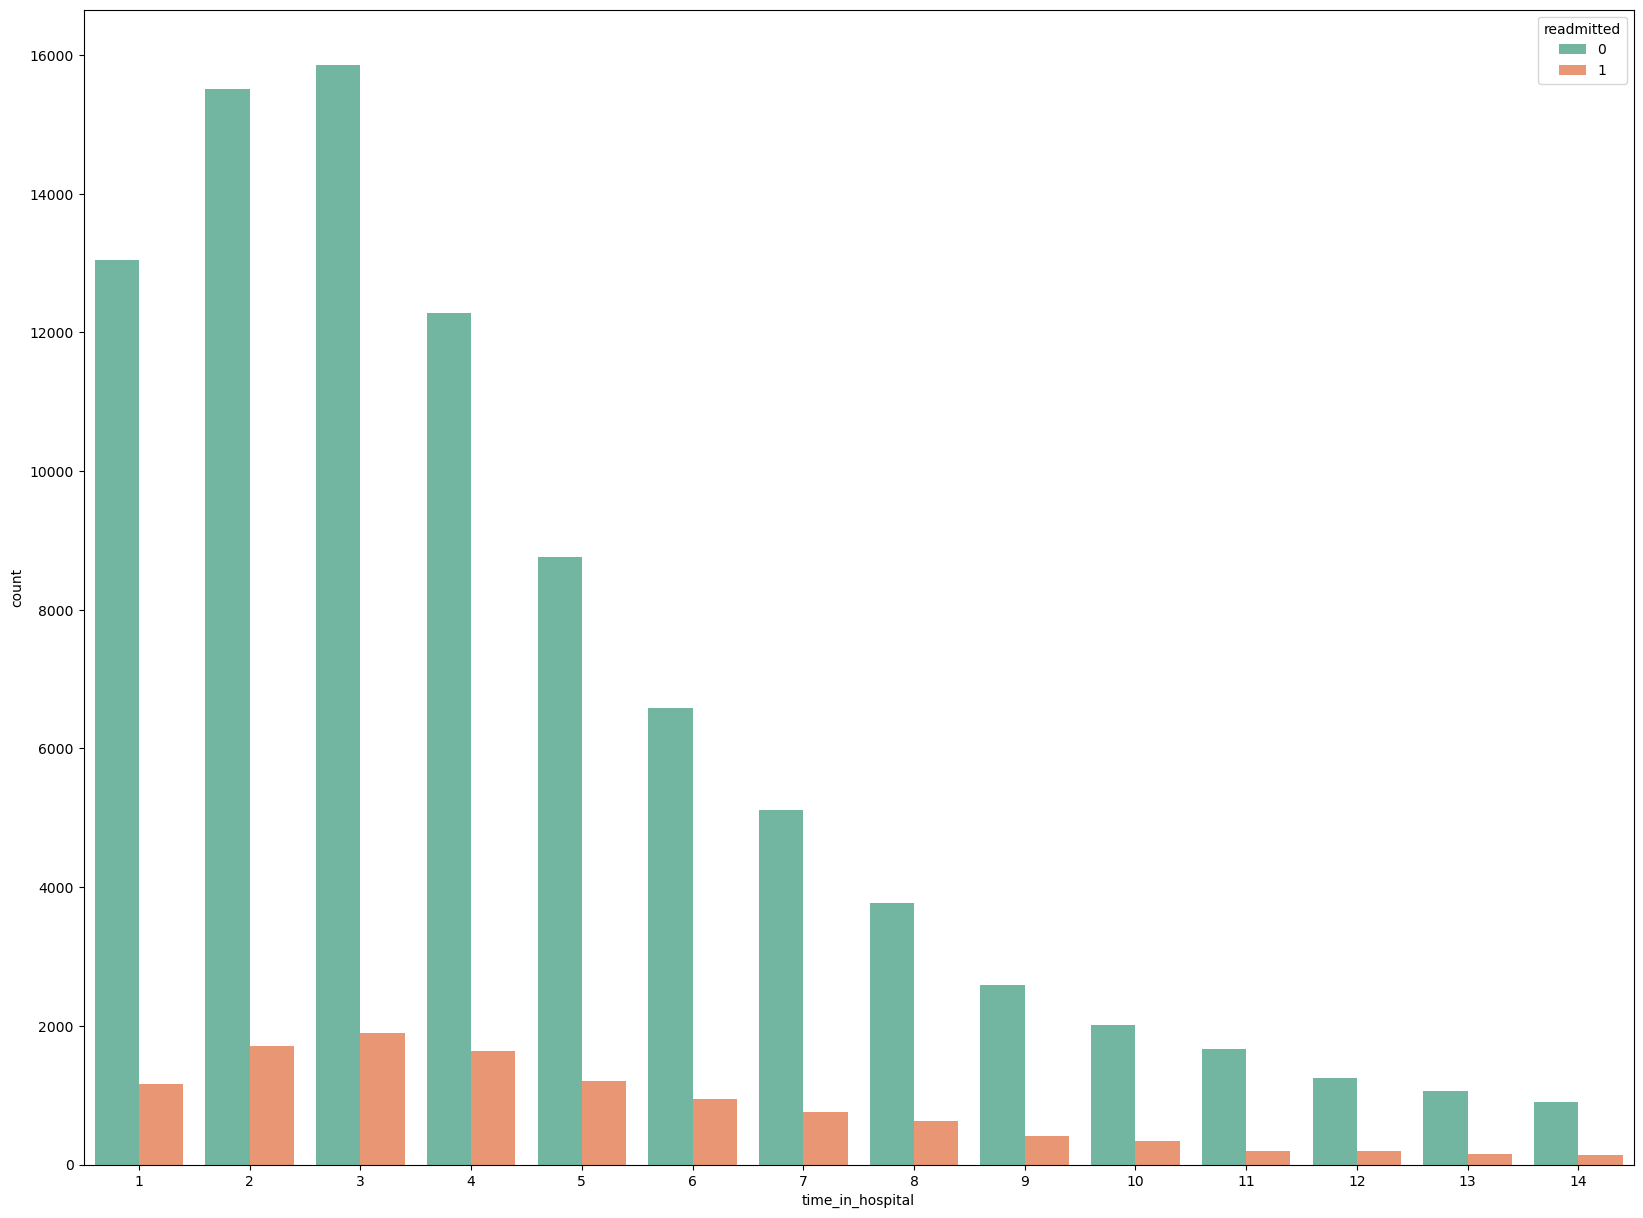

In [225]:
plt.figure(figsize=(20,15))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df, palette='Set2')
plt.show()

In [227]:
df.shape

(101766, 51)